In [17]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("dataset/snp500_history.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1,1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
2,1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
3,1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
4,1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


In [11]:
df['Daily return'] = df["Close"].pct_change().shift(-1)

In [12]:
df = df.dropna()

# Linear Regression

In [13]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = df[features]
y = df['Daily return']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.00014904689641291767


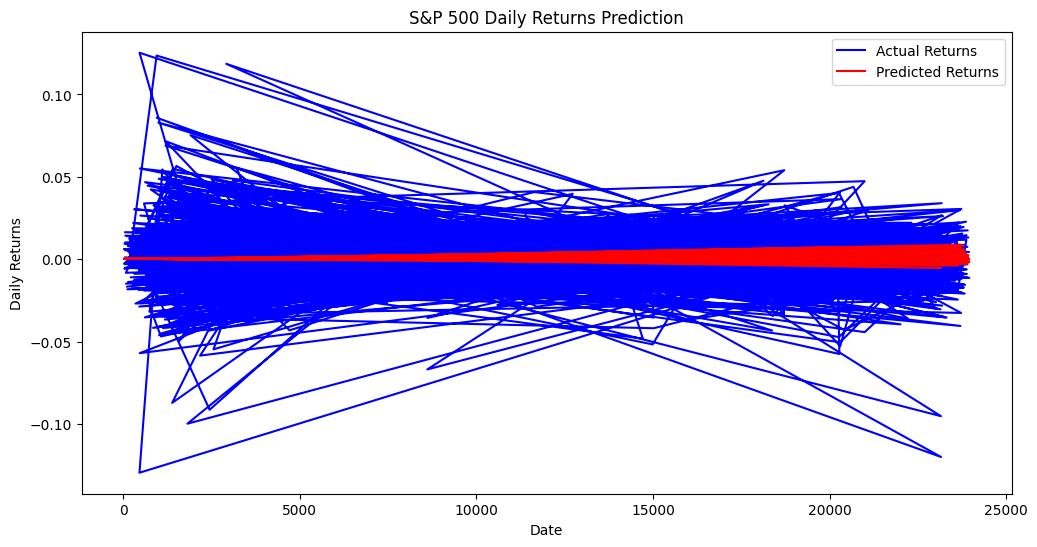

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Returns', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Returns', color='red')
plt.title('S&P 500 Daily Returns Prediction')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.show()

# ARIMA

In [21]:
# Train-test split
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Fit ARIMA model
model = ARIMA(train['Daily return'], order=(5, 1, 5))  # Adjust order as needed
fit_model = model.fit()

# Make predictions
predictions = fit_model.forecast(steps=len(test))

c:\Users\prixe\Documents\dev\snp-500-forecast\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


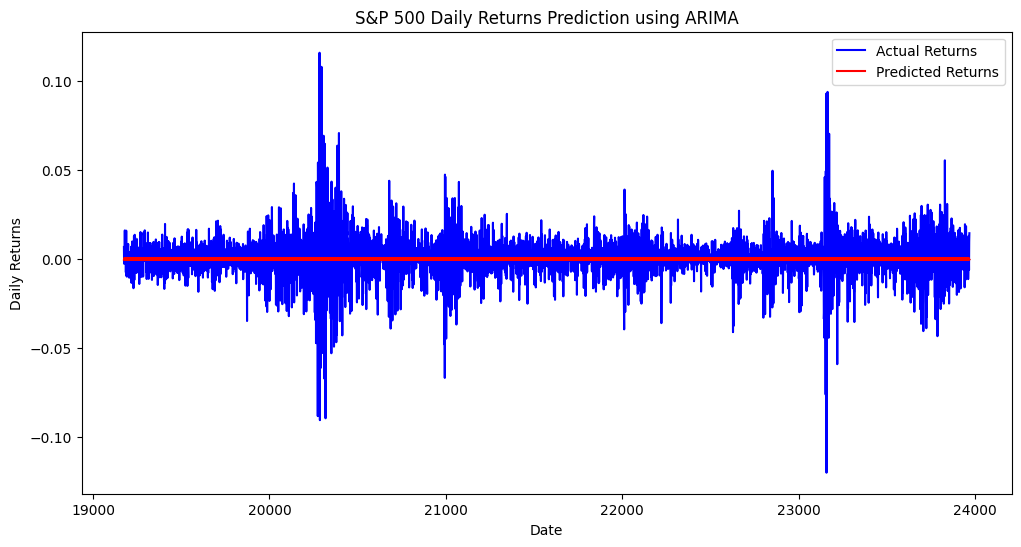

In [20]:
# Visualize predictions
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Daily return'], label='Actual Returns', color='blue')
plt.plot(test.index, predictions, label='Predicted Returns', color='red')
plt.title('S&P 500 Daily Returns Prediction using ARIMA')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.show()